In [86]:
from MLP import MLP
from MLP.loss import MSE, CROSSENTROPY
from MLP.activation import Activation
from MLP.initialization import WeightInitialization
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [92]:
def testdata_MLP_regression(data: np.ndarray,
                            y_train: np.ndarray,
                            test: np.ndarray,
                            y_test: np.ndarray,
                            hidden_layers: List[int],
                            weight_initialization: WeightInitialization,
                            random_seed: int,
                            activation_functions: List[Activation],
                            loss_function,
                            reg_L1: float,
                            reg_L2: float,
                            batch_size: int,
                            epochs: int,
                            learning_rate: float,
                            momentum: float,
                            show_plots: bool) -> Tuple[np.ndarray, np.ndarray]:

    data_mean = np.mean(data, axis=0)
    data_std = np.std(data, axis=0)
    target_mean = np.mean(y_train, axis=0)
    target_std = np.std(y_train, axis=0)

    data = (data - data_mean) / data_std
    test = (test - data_mean) / data_std
    y_train = (y_train - target_mean) / target_std
    y_test = (y_test - target_mean) / target_std

    mlp = MLP(data,
              y_train.reshape(-1, 1),
              hidden_layers=hidden_layers,
              weight_initialization=weight_initialization,
              random_seed=random_seed,
              activation_functions=activation_functions,
              problem_type=MLP.ProblemType.REGRESSION,
              loss_function=loss_function)
    y_test_predict = mlp.predict(test)
#     print(f"\n\nInitial MSE: {MSE(y_test_predict, y_test.reshape(-1, 1))}")

    mlp.fit(reg_L1=reg_L1,
            reg_L2=reg_L2,
            batch_size=batch_size,
            epochs=epochs,
            learning_rate=learning_rate,
            momentum=momentum,
            test_data=test,
            test_target=y_test.reshape(-1, 1))

    y_test_predict = mlp.predict(test)
#     print(f"\n\nPost training MSE: {MSE(y_test_predict, y_test.reshape(-1, 1))}\n")

    if show_plots:
        mlp.visualize_architecture()
        mlp.scatter_regression(y_test, test)
        mlp.print_loss_by_epoch()
        plt.show()

    return mlp.loss_values, mlp.test_loss_values

def testdata_MLP_classification(data: np.ndarray,
                                y_train: np.ndarray,
                                test: np.ndarray,
                                y_test: np.ndarray,
                                hidden_layers: List[int],
                                weight_initialization: WeightInitialization,
                                random_seed: int,
                                activation_functions: List[Activation],
                                loss_function,
                                reg_L1: float,
                                reg_L2: float,
                                batch_size: int,
                                epochs: int,
                                learning_rate: float,
                                momentum: float,
                                show_plots: bool) -> Tuple[np.ndarray, np.ndarray]:

    data_mean = np.mean(data, axis=0)
    data_std = np.std(data, axis=0)

    data = (data - data_mean) / data_std
    test = (test - data_mean) / data_std

    # one hot encoding
    n_values = np.max(y_train) + 1
    target = np.eye(n_values)[y_train]
    test_target = np.eye(n_values)[y_test]

    mlp = MLP(data,
              target,
              hidden_layers=hidden_layers,
              weight_initialization=weight_initialization,
              random_seed=random_seed,
              activation_functions=activation_functions,
              problem_type=MLP.ProblemType.CLASSIFICATION,
              loss_function=loss_function)

    mlp.fit(reg_L1=reg_L1,
            reg_L2=reg_L2,
            batch_size=batch_size,
            epochs=epochs,
            learning_rate=learning_rate,
            momentum=momentum,
            test_data=test,
            test_target=test_target)
    y_test_predict = mlp.predict(test)

#     print(f"Classification accuracy: {np.mean(y_test_predict == y_test)}\n")

    if show_plots:
        mlp.scatter_classification(y_test, test)
        mlp.print_loss_by_epoch()
        plt.show()

    return mlp.loss_values, mlp.test_loss_values


100%|██████████| 1000/1000 [00:29<00:00, 33.81it/s]


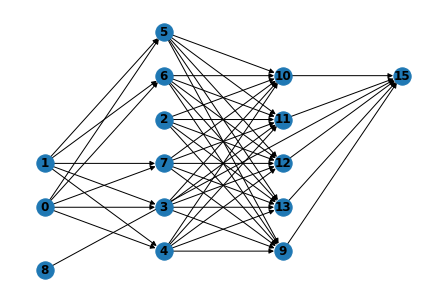

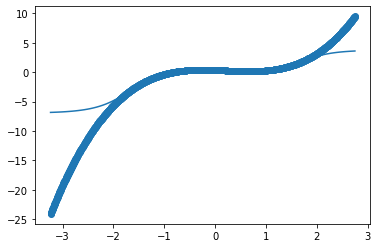

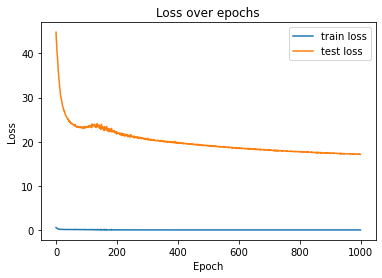

In [46]:
df: pd.DataFrame = pd.read_csv("test/data/regression/data.cube.train.1000.csv")
data: np.ndarray = df[["x"]].to_numpy()
target: np.ndarray = df["y"].to_numpy()
df = pd.read_csv("test/data/regression/data.cube.test.1000.csv")
test_data: np.ndarray = df[["x"]].to_numpy()
test_target: np.ndarray = df["y"].to_numpy()

# sample call
_ = testdata_MLP_regression(data=data,
                        y_train=target,
                        test=test_data,
                        y_test=test_target,
                        hidden_layers=[5, 5],
                        weight_initialization=WeightInitialization.HE,
                        random_seed=0,
                        activation_functions=[Activation.SIGMOID, Activation.SIGMOID, Activation.LINEAR],
                        loss_function=MSE,
                        reg_L1=0,
                        reg_L2=0,
                        batch_size=40,
                        epochs=1000,
                        learning_rate=1e-2,
                        momentum=0,
                        show_plots=True)

# Learning rate choice

In [50]:
# static config
hidden_layers = [5,5]
results = []
learning_rates = [1e-8*np.sqrt(10)**i for i in range(10)]
for i, learning_rate in enumerate(learning_rates):
    MSEs = []
    for random_seed in range(3):
        loss_values, loss_test_values = testdata_MLP_regression(data=data,
                        y_train=target,
                        test=test_data,
                        y_test=test_target,
                        hidden_layers=hidden_layers,
                        weight_initialization=WeightInitialization.HE,
                        random_seed=random_seed,
                        activation_functions=[Activation.SIGMOID, Activation.SIGMOID, Activation.SIGMOID, Activation.LINEAR],
                        loss_function=MSE,
                        reg_L1=0,
                        reg_L2=0,
                        batch_size=30,
                        epochs=1000,
                        learning_rate=learning_rate,
                        momentum=0,
                        show_plots=False)
        MSEs.append(loss_test_values[-1])
    results.append(np.mean(MSEs))
        

 43%|████▎     | 427/1000 [00:05<00:06, 84.02it/s]


KeyboardInterrupt: 

In [ ]:
plt.plot(np.log10(learning_rates), results)

In [48]:
# data preparation
df: pd.DataFrame = pd.read_csv("test/data/classification/data.three_gauss.train.100.csv")
data: np.ndarray = df[["x", "y"]].to_numpy()
target: np.ndarray = df["cls"].to_numpy()
df = pd.read_csv("test/data/classification/data.three_gauss.test.100.csv")
test_data: np.ndarray = df[["x", "y"]].to_numpy()
test_target: np.ndarray = df["cls"].to_numpy()

# Activation function experiment

## Regression

### Activation

In [81]:
df: pd.DataFrame = pd.read_csv("test/data/regression/data.activation.train.1000.csv")
data: np.ndarray = df[["x"]].to_numpy()
target: np.ndarray = df["y"].to_numpy()
df = pd.read_csv("test/data/regression/data.activation.test.1000.csv")
test_data: np.ndarray = df[["x"]].to_numpy()
test_target: np.ndarray = df["y"].to_numpy()
hidden_layers = [5,5]
results = []
activation_functions = [Activation.RELU, Activation.SIGMOID, Activation.TANH]
for i, activation_function in enumerate(activation_functions):
    MSEs = []
    for random_seed in range(3):
        loss_values, loss_test_values = testdata_MLP_regression(data=data,
                        y_train=target,
                        test=test_data,
                        y_test=test_target,
                        hidden_layers=hidden_layers,
                        weight_initialization=WeightInitialization.HE,
                        random_seed=random_seed,
                        activation_functions=[activation_function]*len(hidden_layers) + [Activation.LINEAR],
                        loss_function=MSE,
                        reg_L1=0,
                        reg_L2=0,
                        batch_size=30,
                        epochs=1000,
                        learning_rate=1e-4,
                        momentum=0.9,
                        show_plots=False)
        MSEs.append(loss_test_values[-1])
    results.append(np.mean(MSEs))

100%|██████████| 1000/1000 [00:10<00:00, 91.43it/s]


Text(0, 0.5, 'Loss value')

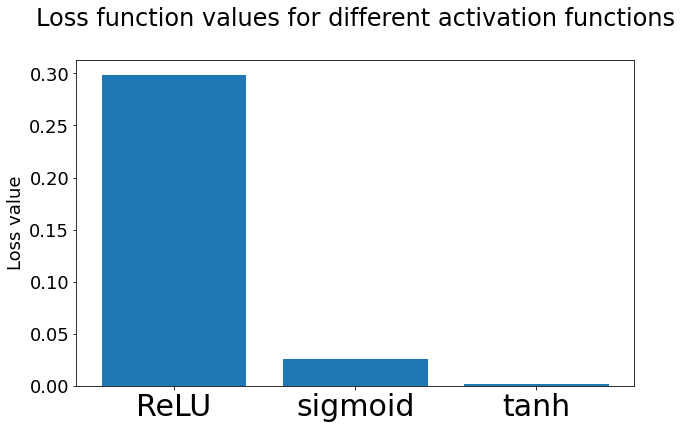

In [82]:
plt.figure(figsize=(10,6))
plt.bar(["ReLU", "sigmoid", "tanh"], results) 
plt.title("Loss function values for different activation functions\n", fontsize=24)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 18)
plt.ylabel("Loss value", fontsize = 18)

### Cube

In [89]:
df: pd.DataFrame = pd.read_csv("test/data/regression/data.cube.train.1000.csv")
data: np.ndarray = df[["x"]].to_numpy()
target: np.ndarray = df["y"].to_numpy()
df = pd.read_csv("test/data/regression/data.cube.test.1000.csv")
test_data: np.ndarray = df[["x"]].to_numpy()
test_target: np.ndarray = df["y"].to_numpy()
hidden_layers = [5,5]
results = []
activation_functions = [Activation.RELU, Activation.SIGMOID, Activation.TANH]
for i, activation_function in enumerate(activation_functions):
    MSEs = []
    for random_seed in range(3):
        loss_values, loss_test_values = testdata_MLP_regression(data=data,
                        y_train=target,
                        test=test_data,
                        y_test=test_target,
                        hidden_layers=hidden_layers,
                        weight_initialization=WeightInitialization.HE,
                        random_seed=random_seed,
                        activation_functions=[activation_function]*len(hidden_layers) + [Activation.LINEAR],
                        loss_function=MSE,
                        reg_L1=0,
                        reg_L2=0,
                        batch_size=30,
                        epochs=1000,
                        learning_rate=1e-4,
                        momentum=0.9,
                        show_plots=False)
        MSEs.append(loss_test_values[-1])
    results.append(np.mean(MSEs))

KeyError: 'cls'

Text(0, 0.5, 'Loss value')

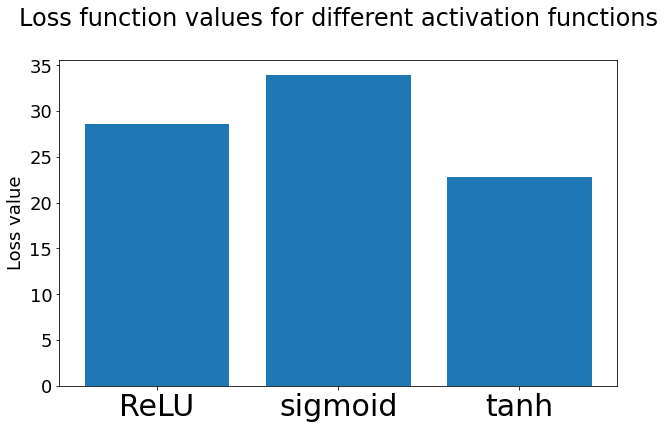

In [80]:
plt.figure(figsize=(10,6))
plt.bar(["ReLU", "sigmoid", "tanh"], results) 
plt.title("Loss function values for different activation functions\n", fontsize=24)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 18)
plt.ylabel("Loss value", fontsize = 18)
plt.show()

## Classification

### Simple

In [93]:
df: pd.DataFrame = pd.read_csv("test/data/classification/data.simple.train.100.csv")
data: np.ndarray = df[["x", "y"]].to_numpy()
target: np.ndarray = df["cls"].to_numpy()
df = pd.read_csv("test/data/classification/data.simple.test.100.csv")
test_data: np.ndarray = df[["x", "y"]].to_numpy()
test_target: np.ndarray = df["cls"].to_numpy()
hidden_layers = [5,5]
results = []
activation_functions = [Activation.RELU, Activation.SIGMOID, Activation.TANH]
for i, activation_function in enumerate(activation_functions):
    CEs = []
    for random_seed in range(3):
        loss_values, loss_test_values = testdata_MLP_classification(data=data,
                        y_train=target,
                        test=test_data,
                        y_test=test_target,
                        hidden_layers=hidden_layers,
                        weight_initialization=WeightInitialization.HE,
                        random_seed=random_seed,
                        activation_functions=[activation_function]*len(hidden_layers) + [Activation.SOFTMAX],
                        loss_function=CROSSENTROPY,
                        reg_L1=0,
                        reg_L2=0,
                        batch_size=30,
                        epochs=1000,
                        learning_rate=1e-4,
                        momentum=0.9,
                        show_plots=False)
        CEs.append(loss_test_values[-1])
    results.append(np.mean(CEs))

100%|██████████| 1000/1000 [00:02<00:00, 391.79it/s]


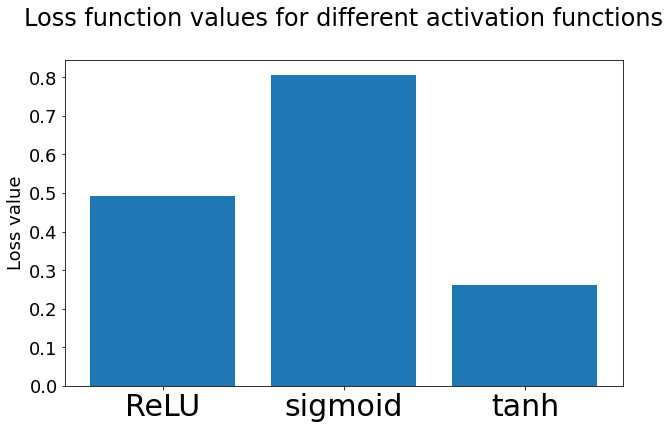

In [94]:
plt.figure(figsize=(10,6))
plt.bar(["ReLU", "sigmoid", "tanh"], results) 
plt.title("Loss function values for different activation functions\n", fontsize=24)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 18)
plt.ylabel("Loss value", fontsize = 18)
plt.show()

### Three gauss

In [95]:
df: pd.DataFrame = pd.read_csv("test/data/classification/data.three_gauss.train.100.csv")
data: np.ndarray = df[["x", "y"]].to_numpy()
target: np.ndarray = df["cls"].to_numpy()
df = pd.read_csv("test/data/classification/data.three_gauss.test.100.csv")
test_data: np.ndarray = df[["x", "y"]].to_numpy()
test_target: np.ndarray = df["cls"].to_numpy()
hidden_layers = [5,5]
results = []
activation_functions = [Activation.RELU, Activation.SIGMOID, Activation.TANH]
for i, activation_function in enumerate(activation_functions):
    CEs = []
    for random_seed in range(3):
        loss_values, loss_test_values = testdata_MLP_classification(data=data,
                        y_train=target,
                        test=test_data,
                        y_test=test_target,
                        hidden_layers=hidden_layers,
                        weight_initialization=WeightInitialization.HE,
                        random_seed=random_seed,
                        activation_functions=[activation_function]*len(hidden_layers) + [Activation.SOFTMAX],
                        loss_function=CROSSENTROPY,
                        reg_L1=0,
                        reg_L2=0,
                        batch_size=30,
                        epochs=1000,
                        learning_rate=1e-4,
                        momentum=0.9,
                        show_plots=False)
        CEs.append(loss_test_values[-1])
    results.append(np.mean(CEs))

100%|██████████| 1000/1000 [00:04<00:00, 237.10it/s]


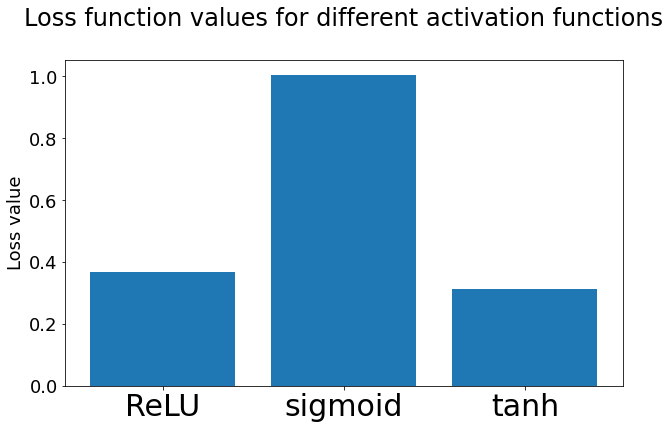

In [97]:
plt.figure(figsize=(10,6))
plt.bar(["ReLU", "sigmoid", "tanh"], results) 
plt.title("Loss function values for different activation functions\n", fontsize=24)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 18)
plt.ylabel("Loss value", fontsize = 18)
plt.show()

100%|██████████| 1000/1000 [00:06<00:00, 160.19it/s]


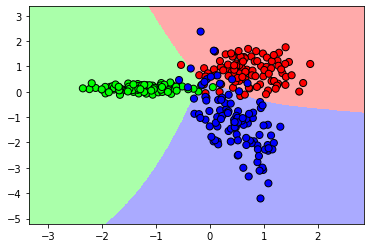

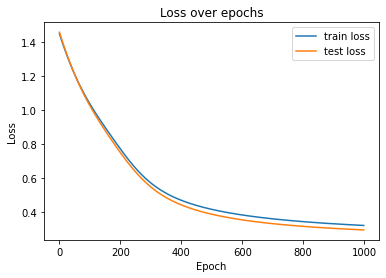

In [99]:
_ = testdata_MLP_classification(data=data,
                        y_train=target,
                        test=test_data,
                        y_test=test_target,
                        hidden_layers=hidden_layers,
                        weight_initialization=WeightInitialization.HE,
                        random_seed=random_seed,
                        activation_functions=[activation_function]*len(hidden_layers) + [Activation.SOFTMAX],
                        loss_function=CROSSENTROPY,
                        reg_L1=0,
                        reg_L2=0,
                        batch_size=30,
                        epochs=1000,
                        learning_rate=1e-4,
                        momentum=0.9,
                        show_plots=True)

# Architecture experiment

## Regression

## Classification

# Loss function experiment

## Regression

## Classification